In [1]:
# Standard imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Insert local path to MAVE-NN at beginning of Python's path
import sys
sys.path.insert(0, '/Users/tareen/Desktop/Research_Projects/2020_mavenn_github/mavenn')

# Load mavenn
import mavenn
print(mavenn.__path__)

['/Users/tareen/Desktop/Research_Projects/2020_mavenn_github/mavenn/mavenn']


In [2]:
# Load gfp dataset from mavenn
data_df = mavenn.load_example_dataset(name='gfp')

# Separate test from data_df
ix_test = data_df['set']=='test'
test_df = data_df[ix_test].reset_index(drop=True)
print(f'test N: {len(test_df):,}')

# Remove test data from data_df
data_df = data_df[~ix_test].reset_index(drop=True)
print(f'training + validation N: {len(data_df):,}')
data_df.head(10)

test N: 10,985
training + validation N: 43,040


,set,HammingDistance,aaMutations,y,std,x
0,training,0,3.7192121319,0.106992,NaN,KGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKFIC...
1,training,1,SA108D,1.301030,NaN,KGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKFIC...
2,training,5,SA108D:SN144D:SI186V:SM231T:SL234P,1.301031,NaN,KGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKFIC...
3,training,4,SA108D:SY141N:SH146L:SE220G,1.301189,NaN,KGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKFIC...
4,training,1,SA108G,3.708478,0.020613,KGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKFIC...
5,training,4,SA108G:SK138M:SR166C:SL234P,3.582764,NaN,KGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKFIC...
6,training,5,SA108G:SK154E:SF163S:SL192Q:SL193P,1.499573,NaN,KGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKFIC...
7,training,2,SA108G:SK156R,3.659013,NaN,KGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKFIC...
8,training,5,SA108G:SK156R:SI159V:SI186V:ST223S,3.573855,NaN,KGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKFIC...
9,validation,5,SA108P:SK111R:SG172S:SL176P:SS200G,1.301031,NaN,KGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKFIC...


In [3]:
# Get sequence length
L = len(data_df['x'][0])

# Define model
model = mavenn.Model(regression_type='GE',
                     L=L,
                     alphabet='protein*',
                     gpmap_type='additive',                     
                     ge_noise_model_type='Gaussian',
                     ge_heteroskedasticity_order=0)

In [4]:
# Set training data
model.set_data(x=data_df['x'],
               y=data_df['y'],
               validation_flags=(data_df['set']=='validation'),
               shuffle=True)

N = 43,040 observations set as training data.
Using 24.7% for validation.
Data shuffled.
Time to set data: 4.13 sec.


In [5]:
# Fit model to data
history = model.fit(learning_rate=.0002,
                    epochs=1000,
                    batch_size=500,
                    early_stopping=True,
                    early_stopping_patience=25,
                    linear_initialization=False)

Epoch 1/1000
65/65 [==============================] - 1s 14ms/step - loss: 732.3331 - I_var: -2.1681 - val_loss: 711.5269 - val_I_var: -2.1248
Epoch 2/1000
65/65 [==============================] - 1s 16ms/step - loss: 715.1785 - I_var: -2.1202 - val_loss: 706.0906 - val_I_var: -2.1100
Epoch 3/1000
65/65 [==============================] - 1s 15ms/step - loss: 710.2469 - I_var: -2.1066 - val_loss: 701.9510 - val_I_var: -2.0987
Epoch 4/1000
65/65 [==============================] - 1s 15ms/step - loss: 706.0585 - I_var: -2.0952 - val_loss: 697.6092 - val_I_var: -2.0866
Epoch 5/1000
65/65 [==============================] - 1s 15ms/step - loss: 700.5421 - I_var: -2.0795 - val_loss: 690.6591 - val_I_var: -2.0668
Epoch 6/1000
65/65 [==============================] - 1s 15ms/step - loss: 692.0506 - I_var: -2.0554 - val_loss: 680.5905 - val_I_var: -2.0376
Epoch 7/1000
65/65 [==============================] - 1s 15ms/step - loss: 679.0922 - I_var: -2.0181 - val_loss: 663.9034 - val_I_var: -1.9890

Epoch 58/1000
65/65 [==============================] - 1s 15ms/step - loss: 280.2914 - I_var: -0.8434 - val_loss: 293.0068 - val_I_var: -0.8863
Epoch 59/1000
65/65 [==============================] - 1s 14ms/step - loss: 274.4139 - I_var: -0.8252 - val_loss: 286.0049 - val_I_var: -0.8649
Epoch 60/1000
65/65 [==============================] - 1s 14ms/step - loss: 269.0319 - I_var: -0.8087 - val_loss: 280.9584 - val_I_var: -0.8500
Epoch 61/1000
65/65 [==============================] - 1s 15ms/step - loss: 263.9662 - I_var: -0.7939 - val_loss: 276.6123 - val_I_var: -0.8368
Epoch 62/1000
65/65 [==============================] - 1s 14ms/step - loss: 259.1761 - I_var: -0.7796 - val_loss: 273.7754 - val_I_var: -0.8283
Epoch 63/1000
65/65 [==============================] - 1s 15ms/step - loss: 255.1934 - I_var: -0.7674 - val_loss: 266.9560 - val_I_var: -0.8079
Epoch 64/1000
65/65 [==============================] - 1s 16ms/step - loss: 249.9014 - I_var: -0.7527 - val_loss: 262.8242 - val_I_var: 

Epoch 115/1000
65/65 [==============================] - 1s 14ms/step - loss: 118.7367 - I_var: -0.3595 - val_loss: 150.3593 - val_I_var: -0.4515
Epoch 116/1000
65/65 [==============================] - 1s 14ms/step - loss: 119.6023 - I_var: -0.3611 - val_loss: 149.4908 - val_I_var: -0.4489
Epoch 117/1000
65/65 [==============================] - 1s 14ms/step - loss: 117.4799 - I_var: -0.3565 - val_loss: 149.0799 - val_I_var: -0.4473
Epoch 118/1000
65/65 [==============================] - 1s 14ms/step - loss: 116.7473 - I_var: -0.3526 - val_loss: 148.1984 - val_I_var: -0.4447
Epoch 119/1000
65/65 [==============================] - 1s 15ms/step - loss: 115.4279 - I_var: -0.3476 - val_loss: 148.6959 - val_I_var: -0.4462
Epoch 120/1000
65/65 [==============================] - 1s 15ms/step - loss: 114.2110 - I_var: -0.3451 - val_loss: 147.2863 - val_I_var: -0.4418
Epoch 121/1000
65/65 [==============================] - 1s 15ms/step - loss: 114.4237 - I_var: -0.3454 - val_loss: 159.2550 - val_

Epoch 172/1000
65/65 [==============================] - 1s 15ms/step - loss: 56.9273 - I_var: -0.1691 - val_loss: 98.1550 - val_I_var: -0.2866
Epoch 173/1000
65/65 [==============================] - 1s 14ms/step - loss: 54.6113 - I_var: -0.1624 - val_loss: 105.9513 - val_I_var: -0.3101
Epoch 174/1000
65/65 [==============================] - 1s 15ms/step - loss: 55.4736 - I_var: -0.1631 - val_loss: 96.3066 - val_I_var: -0.2809
Epoch 175/1000
65/65 [==============================] - 1s 14ms/step - loss: 53.5883 - I_var: -0.1584 - val_loss: 104.4957 - val_I_var: -0.3053
Epoch 176/1000
65/65 [==============================] - 1s 14ms/step - loss: 51.1302 - I_var: -0.1511 - val_loss: 92.5737 - val_I_var: -0.2692
Epoch 177/1000
65/65 [==============================] - 1s 15ms/step - loss: 49.6814 - I_var: -0.1472 - val_loss: 91.2031 - val_I_var: -0.2648
Epoch 178/1000
65/65 [==============================] - 1s 15ms/step - loss: 47.2327 - I_var: -0.1385 - val_loss: 90.0724 - val_I_var: -0.26

65/65 [==============================] - 1s 14ms/step - loss: -21.3010 - I_var: 0.0768 - val_loss: 42.0618 - val_I_var: -0.1008
Epoch 230/1000
65/65 [==============================] - 1s 14ms/step - loss: -19.4938 - I_var: 0.0712 - val_loss: 41.5058 - val_I_var: -0.0989
Epoch 231/1000
65/65 [==============================] - 1s 14ms/step - loss: -23.3541 - I_var: 0.0831 - val_loss: 42.3407 - val_I_var: -0.1017
Epoch 232/1000
65/65 [==============================] - 1s 14ms/step - loss: -24.6690 - I_var: 0.0875 - val_loss: 40.8677 - val_I_var: -0.0960
Epoch 233/1000
65/65 [==============================] - 1s 14ms/step - loss: -24.5942 - I_var: 0.0868 - val_loss: 40.9524 - val_I_var: -0.0957
Epoch 234/1000
65/65 [==============================] - 1s 14ms/step - loss: -25.7635 - I_var: 0.0912 - val_loss: 44.7183 - val_I_var: -0.1081
Epoch 235/1000
65/65 [==============================] - 1s 15ms/step - loss: -23.2589 - I_var: 0.0848 - val_loss: 43.3133 - val_I_var: -0.1033
Epoch 236/1000

65/65 [==============================] - 1s 14ms/step - loss: -55.7434 - I_var: 0.1939 - val_loss: 27.7945 - val_I_var: -0.0393
Epoch 287/1000
65/65 [==============================] - 1s 15ms/step - loss: -59.8803 - I_var: 0.2026 - val_loss: 28.1174 - val_I_var: -0.0398
Epoch 288/1000
65/65 [==============================] - 1s 15ms/step - loss: -58.4715 - I_var: 0.2010 - val_loss: 29.5620 - val_I_var: -0.0452
Epoch 289/1000
65/65 [==============================] - 1s 14ms/step - loss: -60.4459 - I_var: 0.2057 - val_loss: 28.0976 - val_I_var: -0.0401
Epoch 290/1000
65/65 [==============================] - 1s 14ms/step - loss: -58.6715 - I_var: 0.2026 - val_loss: 28.1461 - val_I_var: -0.0390
Epoch 291/1000
65/65 [==============================] - 1s 14ms/step - loss: -60.4470 - I_var: 0.2085 - val_loss: 29.7858 - val_I_var: -0.0449
Epoch 292/1000
65/65 [==============================] - 1s 14ms/step - loss: -60.0919 - I_var: 0.2082 - val_loss: 38.5082 - val_I_var: -0.0718
Epoch 293/1000

In [6]:
# Save model
model.save('gfp_ge_additive_homogaussian')

Model saved to these files:
	gfp_ge_additive_homogaussian.pickle
	gfp_ge_additive_homogaussian.h5


In [7]:
# Load model
model = mavenn.load('gfp_ge_additive_homogaussian')

Model loaded from these files:
	gfp_ge_additive_homogaussian.pickle
	gfp_ge_additive_homogaussian.h5


In [8]:
# Subsample indices for easy plotting and information estimation
N_test = len(test_df)
ix = np.random.rand(N_test) < .5

# Get x and y
x_test = test_df['x'].values[ix]
y_test = test_df['y'].values[ix]

On test data:
I_var_test: 0.045 +- 0.048 bits
I_pred_test: 1.214 +- 0.011 bits


Text(0.5, 1.0, 'training hisotry')

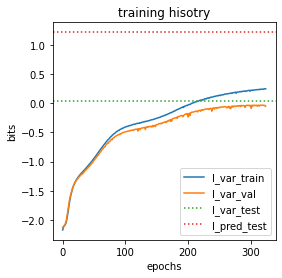

In [9]:
# Show training history
print('On test data:')

# Compute likelihood information
I_var, dI_var =  model.I_variational(x=x_test, y=y_test)
print(f'I_var_test: {I_var:.3f} +- {dI_var:.3f} bits') 

# Compute predictive information
I_pred, dI_pred = model.I_predictive(x=x_test, y=y_test)
print(f'I_pred_test: {I_pred:.3f} +- {dI_pred:.3f} bits')

I_var_hist = model.history['I_var']
val_I_var_hist = model.history['val_I_var']

fig, ax = plt.subplots(1,1,figsize=[4,4])
ax.plot(I_var_hist, label='I_var_train')
ax.plot(val_I_var_hist, label='I_var_val')
ax.axhline(I_var, color='C2', linestyle=':', label='I_var_test')
ax.axhline(I_pred, color='C3', linestyle=':', label='I_pred_test')
ax.legend()
ax.set_xlabel('epochs')
ax.set_ylabel('bits')
ax.set_title('training hisotry')
#ax.set_ylim([0, I_pred*1.2]);

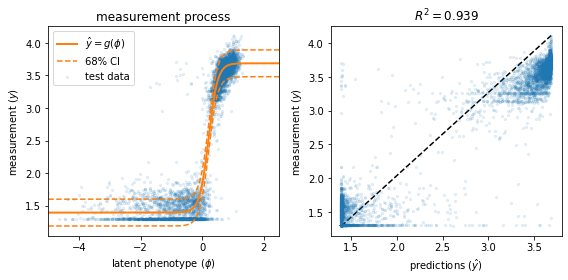

In [10]:
# Compute phi and yhat values
phi = model.x_to_phi(x_test)
yhat = model.phi_to_yhat(phi)

# Create grid for plotting yhat and yqs
phi_lim = [-5, 2.5]
phi_grid = np.linspace(phi_lim[0], phi_lim[1], 1000)
yhat_grid = model.phi_to_yhat(phi_grid)
yqs_grid = model.yhat_to_yq(yhat_grid, q=[.16,.84])

# Create two panels
fig, ax = plt.subplots(1, 2, figsize=[8, 4])

# Illustrate measurement process with GE curve
ax[0].scatter(phi, y_test, color='C0', s=5, alpha=.1, label='test data')
ax[0].plot(phi_grid, yhat_grid, linewidth=2, color='C1',
        label='$\hat{y} = g(\phi)$')
ax[0].plot(phi_grid, yqs_grid[:, 0], linestyle='--', color='C1',
        label='68% CI')
ax[0].plot(phi_grid, yqs_grid[:, 1], linestyle='--', color='C1')
ax[0].set_xlim(phi_lim)
ax[0].set_xlabel('latent phenotype ($\phi$)')
ax[0].set_ylabel('measurement ($y$)')
ax[0].set_title('measurement process')
ax[0].legend()

R_square_on_test = np.corrcoef(yhat,y_test)[0][1]**2
ax[1].plot((min(yhat), max(yhat)), (min(y_test), max(y_test)), '--',color='black')
ax[1].scatter(yhat, y_test, color='C0', s=5, alpha=.1, label='test data',zorder=10)
ax[1].set_xlabel('predictions ($\hat{y}$)')
ax[1].set_ylabel('measurement ($y$)')
ax[1].set_title("$R^2 = $"+str(R_square_on_test)[0:5])


# Fix up plot
fig.tight_layout()
#plt.savefig('gfp_ge_additive_measurement_process_yhat.png',bbox_inches='tight',dpi=300)
plt.show()

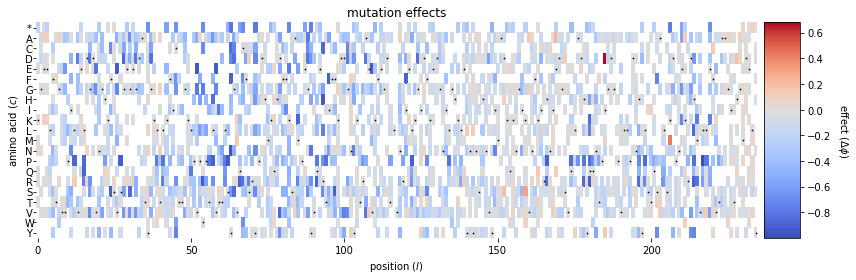

In [11]:
# Set wild-type sequence
gfp_consensus_seq = model.x_stats['consensus_seq']

# Get effects of all single-point mutations on phi
theta_dict = model.get_theta(gauge='user',
                             x_wt=gfp_consensus_seq)

# Create two panels
fig, ax = plt.subplots(1, 1, figsize=[12, 4])

# Left panel: draw heatmap illustrating 1pt mutation effects
ax, cb = mavenn.heatmap(theta_dict['theta_lc'],
                        alphabet=theta_dict['alphabet'],
                        seq=gfp_consensus_seq,
                        #cmap='PiYG',
                        ccenter=0,
                        ax=ax)
ax.set_xlabel('position ($l$)')
ax.set_ylabel('amino acid ($c$)')
cb.set_label('effect ($\Delta\phi$)', rotation=-90, va="bottom")
ax.set_title('mutation effects')



# Fix up plot
fig.tight_layout()
#plt.savefig('gfp_additive_heatmap.png',bbox_inches='tight',dpi=300)
plt.show()
